In [1]:
from Model import *

Tests with no pooling, only Bayesian updating. Initialised with every agent starting with the opinion 0.5.

100%|█████████████████████████████████████████████████████████████████████████████████| 110/110 [01:31<00:00,  1.21it/s]


Text(0, 0.5, 'Average opinion')

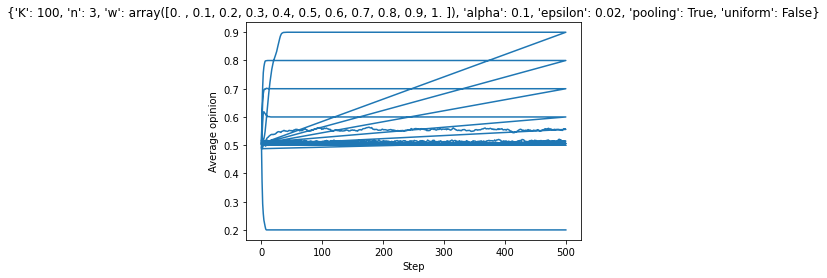

In [68]:
params = {"K": 100, "n": 3, "w": np.linspace(0,1,11), "alpha": 0.1, "epsilon" : 0.02, "pooling" : True, "uniform" : False}

results = mesa.batch_run(
    Model,
    parameters=params,
    iterations=10,
    max_steps=500,
    number_processes=1,
    data_collection_period=1,
    display_progress=True,
)

results_df = pd.DataFrame(results)

plt.figure()
admired_cols = ['Step', 'Average_opinion']
data = []
    
for it in range(10):
    results_it = results_df[results_df.iteration == it]
    results_it = results_it.drop(columns = [col for col in results_it.columns if col not in admired_cols])
    results_it.drop_duplicates()
    data.append(results_it.Average_opinion)
    
plt.plot(results_it.Step, np.mean(np.array(data), axis=0))
plt.title(params)
plt.xlabel("Step")
plt.ylabel("Average opinion")

# results_df = results_df.drop_duplicates()

# for w in params["w"]:
    

{'K': 100, 'n': 3, 'w': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]), 'alpha': 0.1, 'epsilon': 0.02, 'pooling': True, 'uniform': False}


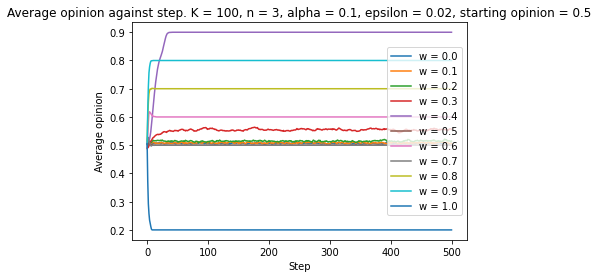

In [69]:
plt.figure()
admired_cols = ['Step', 'Average_opinion']

for w in params["w"]:
    data = []
    results_w = results_df[results_df.w == w]
    for it in range(10):
        results_it = results_w[results_w.iteration == it]
        results_it = results_it.drop(columns = [col for col in results_it.columns if col not in admired_cols])
        results_it.drop_duplicates()
        data.append(results_it.Average_opinion)
    
    plt.plot(results_it.Step, np.mean(np.array(data), axis=0), label = "w = " + str(round(w,1)))
    plt.legend(loc = 5)
plt.title("Average opinion against step. K = 100, n = 3, alpha = 0.1, epsilon = 0.02, starting opinion = 0.5")
plt.xlabel("Step")
plt.ylabel("Average opinion")
print(params)